In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import logging
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))
sys.path.append(os.path.abspath('../src'))
# Import moduls or Script files
from data_loading import LoadData
from logger_config import configure_logging
from time_series_analysis import SalesAnalyzer
from promo_analysis import PromoAnalysis
from plot import Plot
from eda import EDA

In [2]:
# pip install seaborn

In [2]:
# Configure logging
configure_logging()

# Use the class
loader = LoadData()
eda = EDA()
plot = Plot()
sales_behavior = SalesAnalyzer()
promo_analysis = PromoAnalysis()

2025-01-10 08:08:40,835 - INFO - Initialized LoadData class.
2025-01-10 08:08:40,855 - INFO - Initialized EDA class.
2025-01-10 08:08:40,856 - INFO - Initialized Plot class.
2025-01-10 08:08:40,857 - INFO - Initialized Seasonality Sales Analysis class.
2025-01-10 08:08:40,858 - INFO - Initialized Promotoin Sales Analysis class.


In [3]:
try:
    df_sample, df_store, df_test, df_train = loader.read_data()
    print("Data loaded successfully.")
    # Merge sales and store data
    train_merged_df = loader.merge_train_with_store(df_train, df_store)
    test_merged_df = loader.merge_train_with_store(df_test, df_store)
    print("Data merged successfully successfully.")
except Exception as e:
    logging.critical("Error in data loading process.", exc_info=True)

2025-01-10 08:08:41,102 - INFO - Starting to read data files.
2025-01-10 08:08:43,030 - INFO - Successfully read all data files.
2025-01-10 08:08:43,032 - INFO - Starting to merge training or testing data with store data.


Data loaded successfully.


2025-01-10 08:08:43,665 - INFO - Successfully merged training or testing data with store data.
2025-01-10 08:08:43,666 - INFO - Starting to merge training or testing data with store data.
2025-01-10 08:08:43,680 - INFO - Successfully merged training or testing data with store data.


Data merged successfully successfully.


In [4]:
eda.check_promotion_distribution(train_merged_df, test_merged_df)

2025-01-03 09:44:05,541 - INFO - Starting to checking promotion distribution on training and test dataset.
2025-01-03 09:44:05,544 - INFO - Successfully checking promotion distribution of training and testing of store data.


Promotion distribution in training set:
 - Promo: 38.15% active
 - Promo2: 50.06% active

Promotion distribution in test set:
 - Promo: 39.58% active
 - Promo2: 58.06% active

The Promo distribution between train and test sets is similar.
The Promo2 distribution between train and test sets is significantly different.


2025-01-03 09:44:08,629 - INFO - Starting to ploting promotion distribution on training and test dataset.


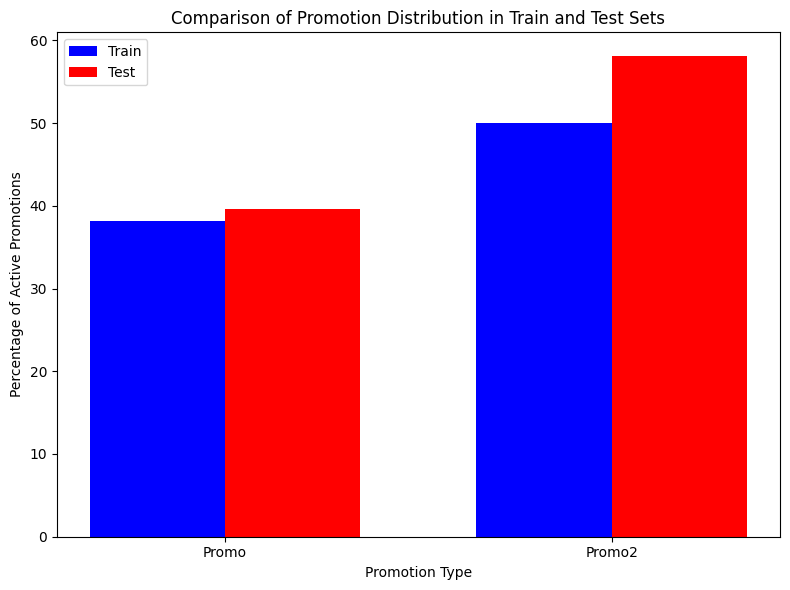

2025-01-03 09:44:10,244 - INFO - Successfully Ploting promotion distribution of training and testing of store data.


In [5]:
plot.check_promotion_distribution_with_plot(train_merged_df, test_merged_df)

In [31]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [32]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
df_state = sales_behavior.tag_holiday_periods(df_train)

2025-01-02 14:38:12,950 - INFO - Starting to Holiday Sales analysis.


In [27]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [23]:
df_state_test = sales_behavior.tag_holiday_periods(df_test)

2025-01-09 15:33:26,472 - INFO - Starting to Holiday Sales analysis.


#### Check & compare sales behavior before, during, and after holidays

In [7]:
df_state = sales_behavior.tag_holiday_periods(df_train)

2025-01-03 09:49:46,132 - INFO - Starting to Holiday Sales analysis.


In [ ]:
# df_state = sales_behavior.tag_holiday_periods(df_train)

In [13]:
df_state_analysis = sales_behavior.holiday_analysis(df_state)
df_state_analysis

,mean,sum,median
HolidayPeriod,,,
After Holiday,6874.590616,276186678,6707.0
Before Holiday,5916.391317,205772090,6022.0
During Holiday,1751.875201,63197146,0.0
Normal,5879.653831,5328024709,5787.0


In [14]:
df_state.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,None,1,Normal
1,2,5,2015-07-31,6064,625,1,1,None,1,Normal
2,3,5,2015-07-31,8314,821,1,1,None,1,Normal
3,4,5,2015-07-31,13995,1498,1,1,None,1,Normal
4,5,5,2015-07-31,4822,559,1,1,None,1,Normal


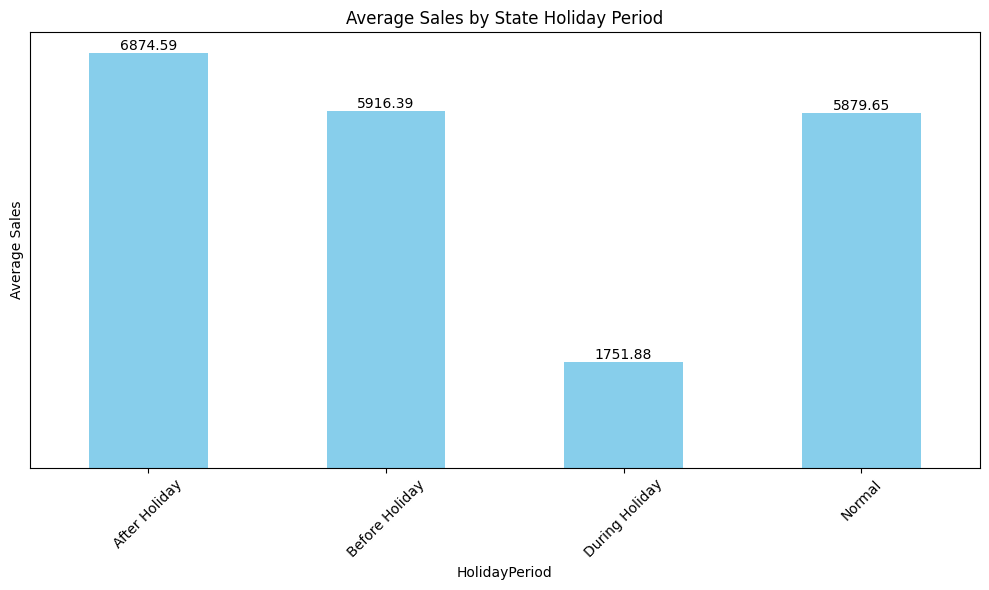

In [15]:
column="Sales"
title="Average Sales by State Holiday Period"
group_by = "HolidayPeriod"
plot.plot_sales_by_period(df_state, column, title, group_by)

In [17]:
df_state.to_csv('train_holiday.csv', index=False)

In [94]:
df = pd.read_csv('train_holiday.csv',low_memory=False)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,NaN,1,Normal
1,2,5,2015-07-31,6064,625,1,1,NaN,1,Normal
2,3,5,2015-07-31,8314,821,1,1,NaN,1,Normal
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,Normal
4,5,5,2015-07-31,4822,559,1,1,NaN,1,Normal
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,During Holiday


#### Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

In [22]:
# Call the method
seasonal_stats, df = sales_behavior.analyze_seasonal_behavior(df)

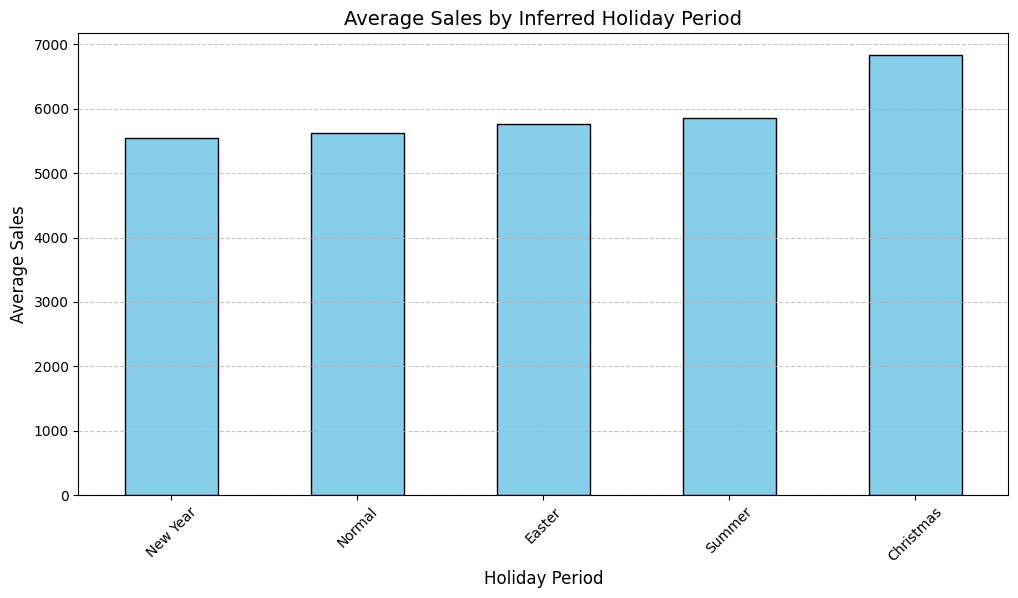

In [34]:
plot.plot_for_holiday_effect(df)

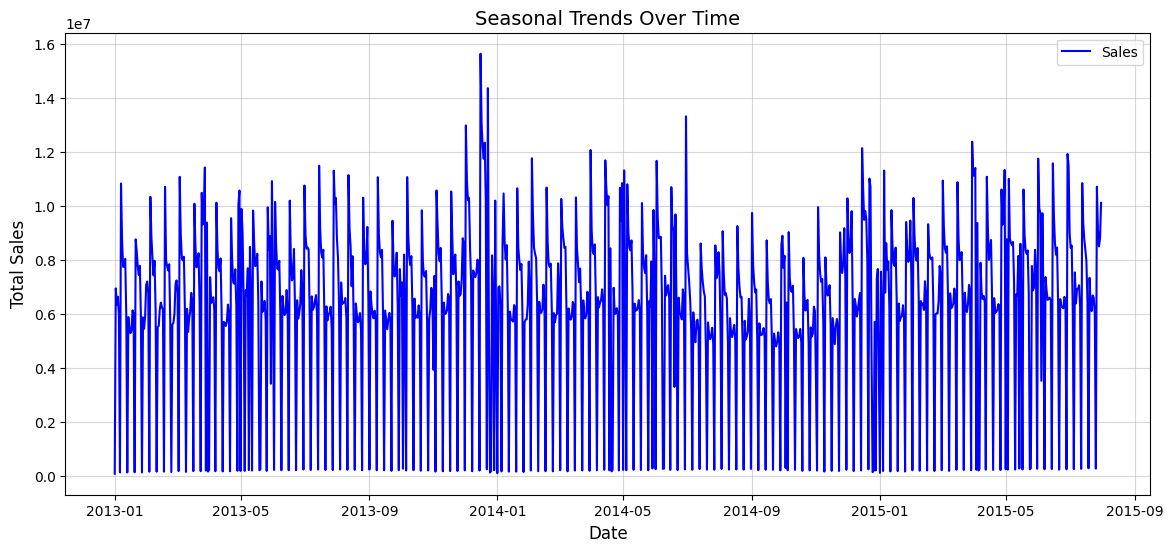

In [35]:
# Call the function
plot.plot_seasonal_trends_line(df)

d:\tenx\10_Academy_AI_Mastery_kifiya_Week_4\Scripts\plot.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InferredHoliday', y='Sales', data=df, palette='Set2')


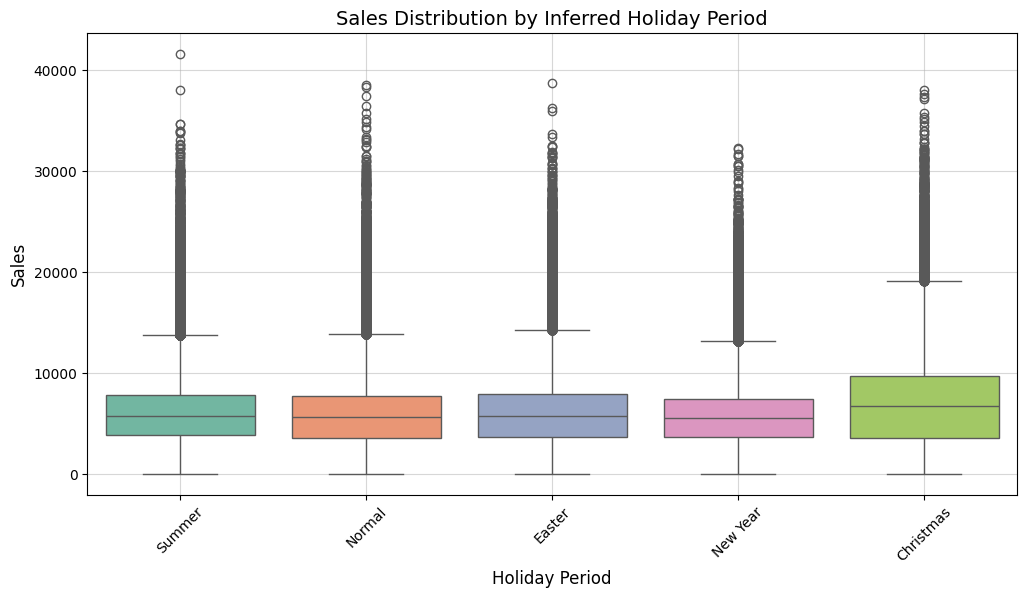

In [36]:
plot.plot_seasonal_trends_box(df)

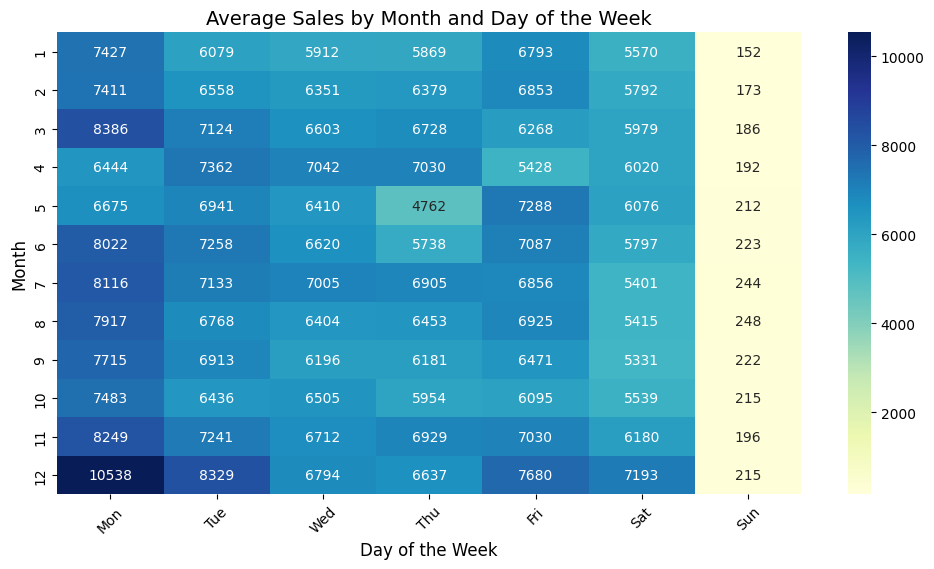

In [37]:
plot.plot_seasonal_trends_heatmap(df)

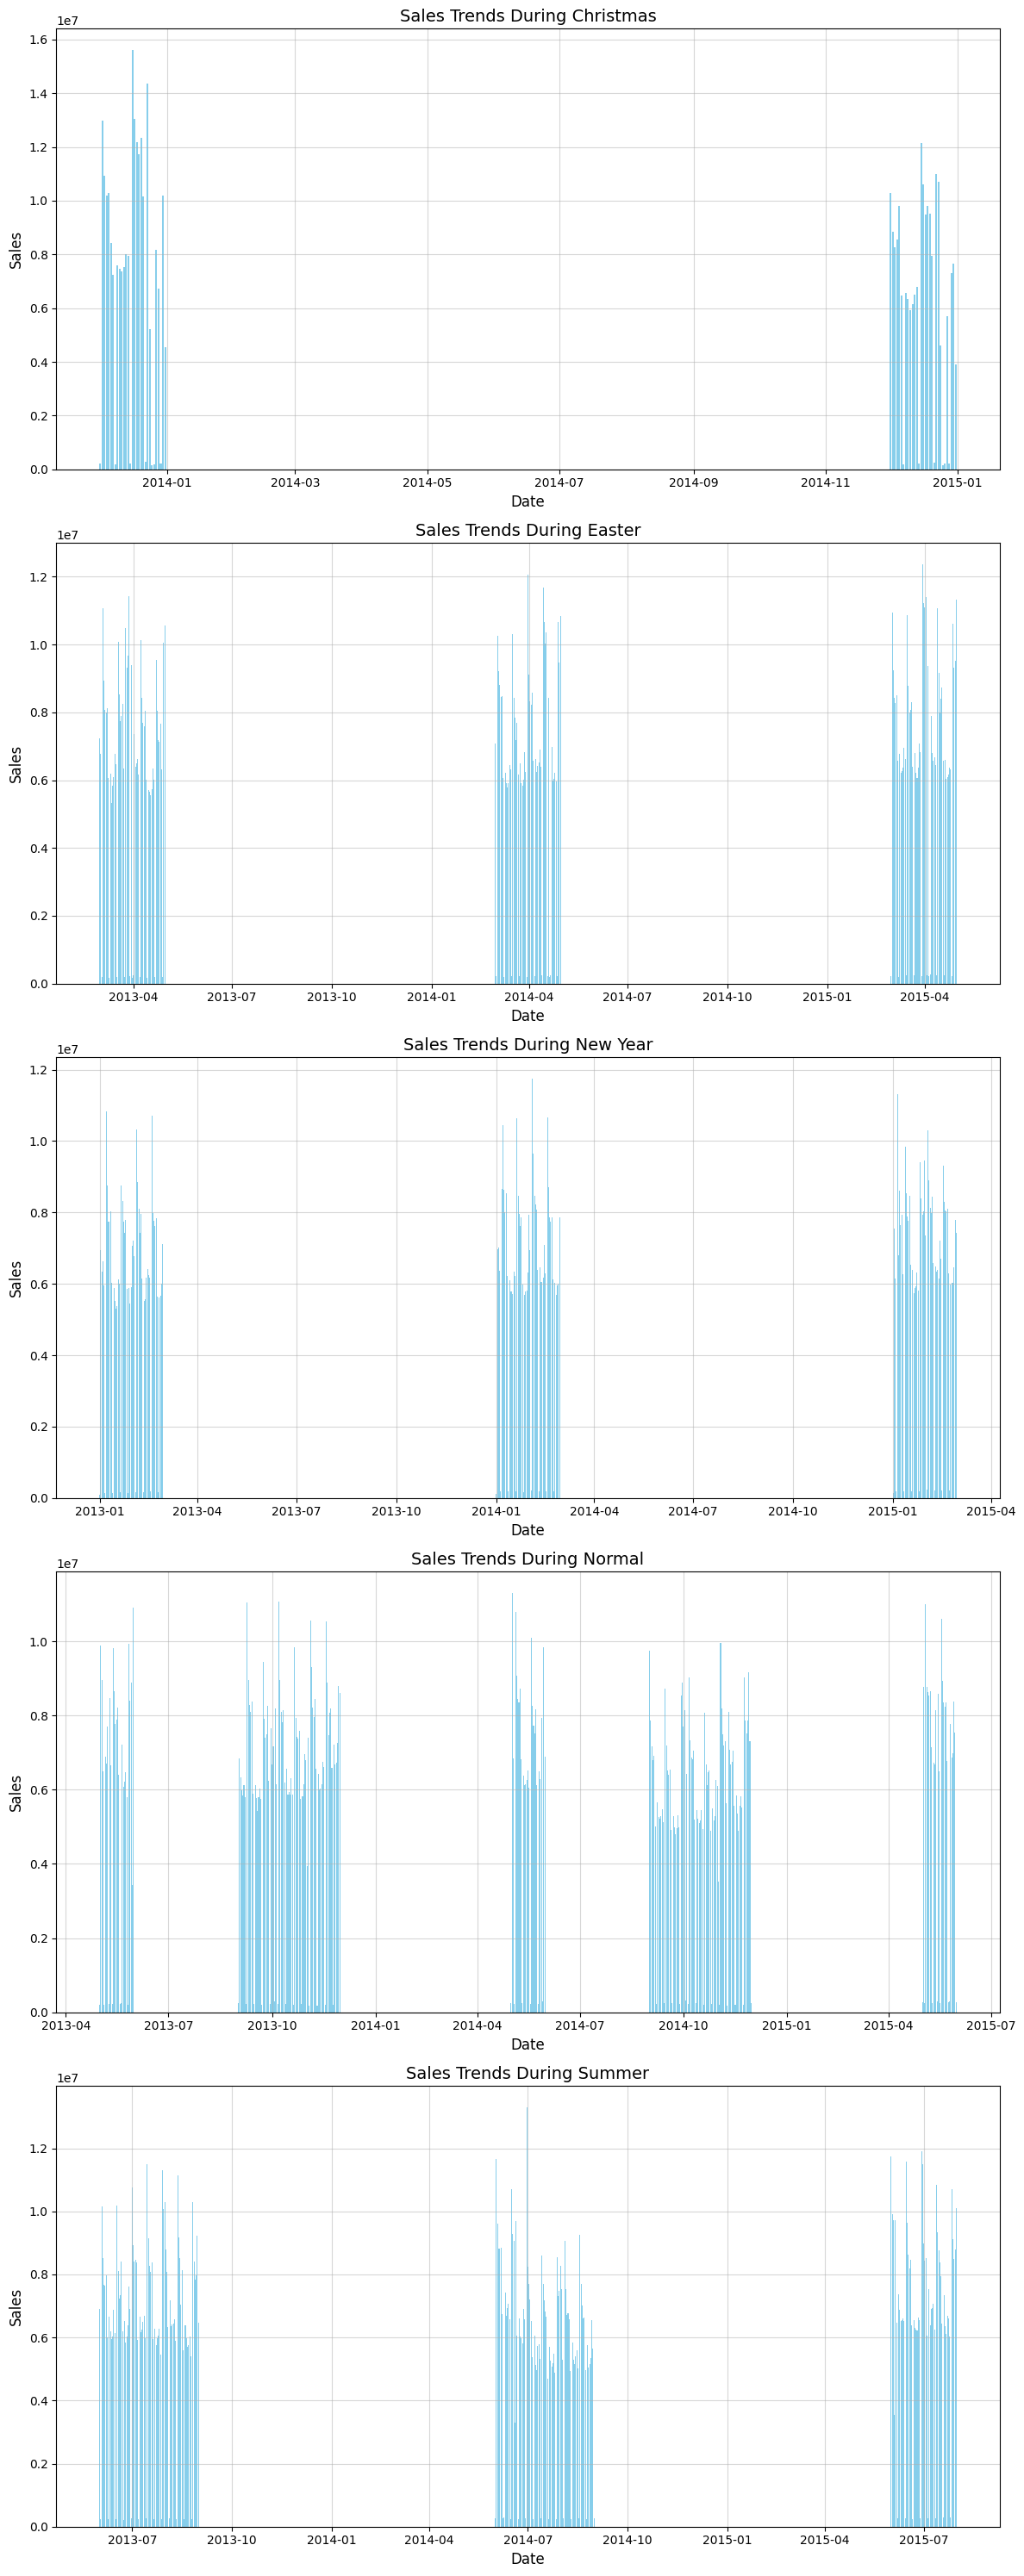

In [38]:
plot.plot_seasonal_trends_subplots(df)

#### What can you say about the correlation between sales and the number of customers?

In [40]:
# Calculate Pearson correlation between Sales and Customers
correlation = df[['Sales', 'Customers']].corr().iloc[0, 1]
correlation


np.float64(0.8947107733016734)

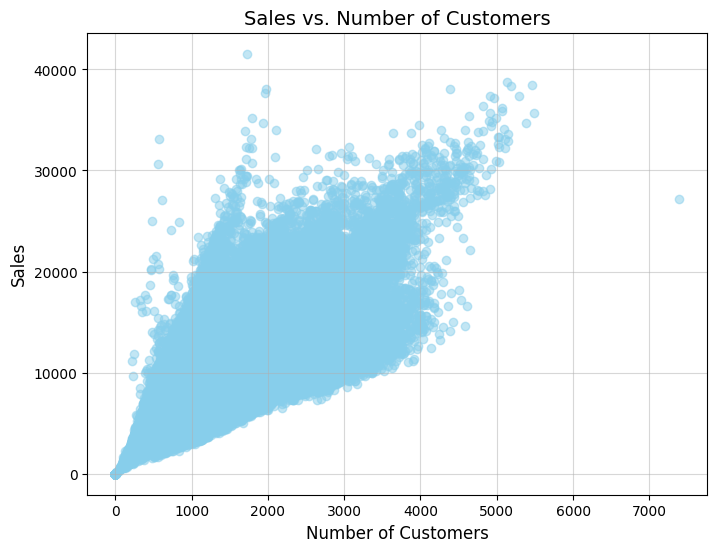

In [43]:
plot.plot_sales_vs_customers(df)

In [42]:
holiday_corr = df.groupby('InferredHoliday')[['Sales', 'Customers']].corr().iloc[0::2, 1].reset_index(level=1, drop=True)

holiday_corr


InferredHoliday
Christmas    0.913701
Easter       0.897391
New Year     0.893906
Normal       0.900327
Summer       0.881385
Name: Customers, dtype: float64

In [44]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,InferredHoliday,Month
0,1,4,2015-07-31,5263,555,1,1,NaN,1,Normal,Summer,7
1,2,4,2015-07-31,6064,625,1,1,NaN,1,Normal,Summer,7
2,3,4,2015-07-31,8314,821,1,1,NaN,1,Normal,Summer,7
3,4,4,2015-07-31,13995,1498,1,1,NaN,1,Normal,Summer,7
4,5,4,2015-07-31,4822,559,1,1,NaN,1,Normal,Summer,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,a,1,During Holiday,New Year,1
1017205,1112,1,2013-01-01,0,0,0,0,a,1,During Holiday,New Year,1
1017206,1113,1,2013-01-01,0,0,0,0,a,1,During Holiday,New Year,1
1017207,1114,1,2013-01-01,0,0,0,0,a,1,During Holiday,New Year,1


#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [50]:
promo_analysis.analyze_promo_effect_on_sales(df)

2025-01-03 10:30:23,620 - INFO - Starting to promotion Analysis on Sales
2025-01-03 10:30:23,741 - INFO - Successfully Checking promotion Analysis on sales


Average Sales with Promo: 7991.15
Average Sales without Promo: 4406.05


(np.float64(7991.152045969903), np.float64(4406.050805160786))

In [51]:
promo_analysis.analyze_promo_effect_on_customers(df)

2025-01-03 10:30:45,219 - INFO - Starting to promotion Analysis on Customers
2025-01-03 10:30:45,311 - INFO - Successfully Checking promotion Analysis on Customers


Average Customers with Promo: 820.10
Average Customers without Promo: 517.82


(np.float64(820.0988146773861), np.float64(517.8235417537579))

In [52]:
promo_analysis.analyze_sales_per_customer(df)

2025-01-03 10:32:09,955 - INFO - Starting to promotion Analysis on sales vs Customers
2025-01-03 10:32:10,095 - INFO - Successfully Checking promotion Analysis Sales vs Customers


Sales per Customer with Promo: 10.18
Sales per Customer without Promo: 8.94


(np.float64(10.178906892166273), np.float64(8.941127696724884))

2025-01-03 10:34:58,532 - INFO - Starting plotting promotion Analysis on sales


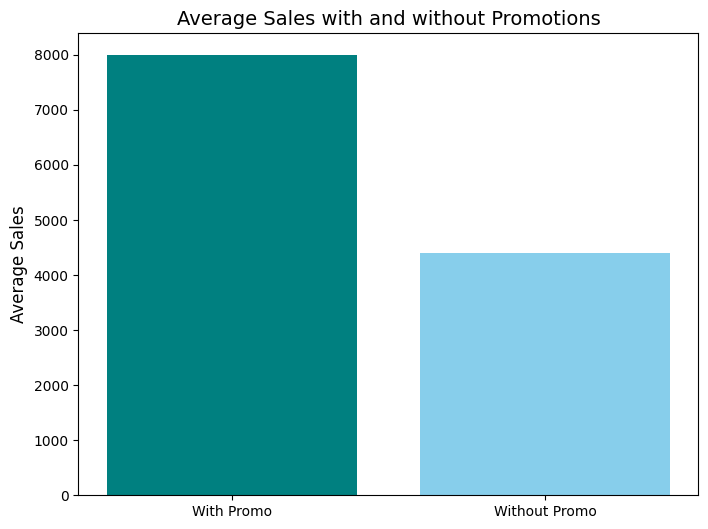

2025-01-03 10:34:58,687 - INFO - Successfully plotting promotion Analysis on sales


In [54]:
plot.plot_sales_comparison(df)

2025-01-03 10:36:28,592 - INFO - Starting plotting promotion Analysis on Customers


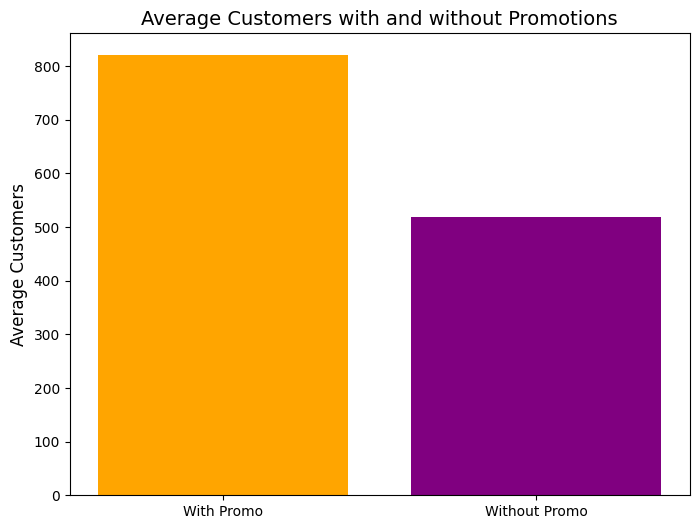

2025-01-03 10:36:28,896 - INFO - Successfully plotting promotion Analysis on Customers


In [55]:
plot.plot_customer_comparison(df)

2025-01-03 10:37:54,556 - INFO - Starting plotting promotion Analysis on Sales vs Customers


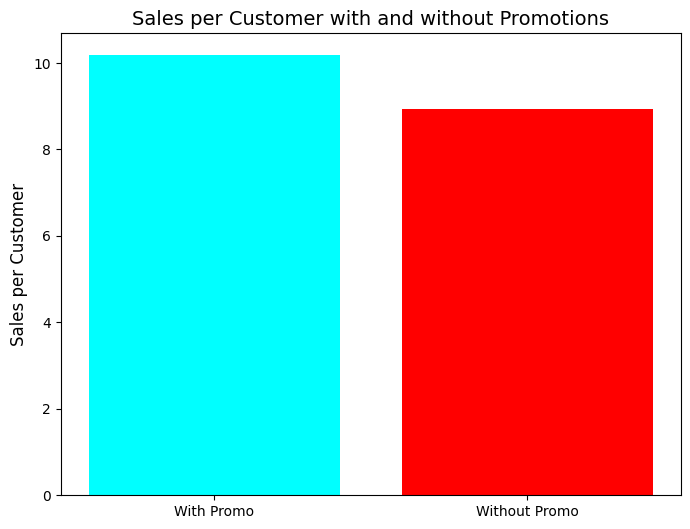

2025-01-03 10:37:54,893 - INFO - Successfully plotting promotion Analysis on Sales vs Customers


In [56]:
plot.plot_sales_per_customer_comparison(df)

2025-01-03 10:40:14,418 - INFO - Starting plotting promotion Analysis Sales Over Time


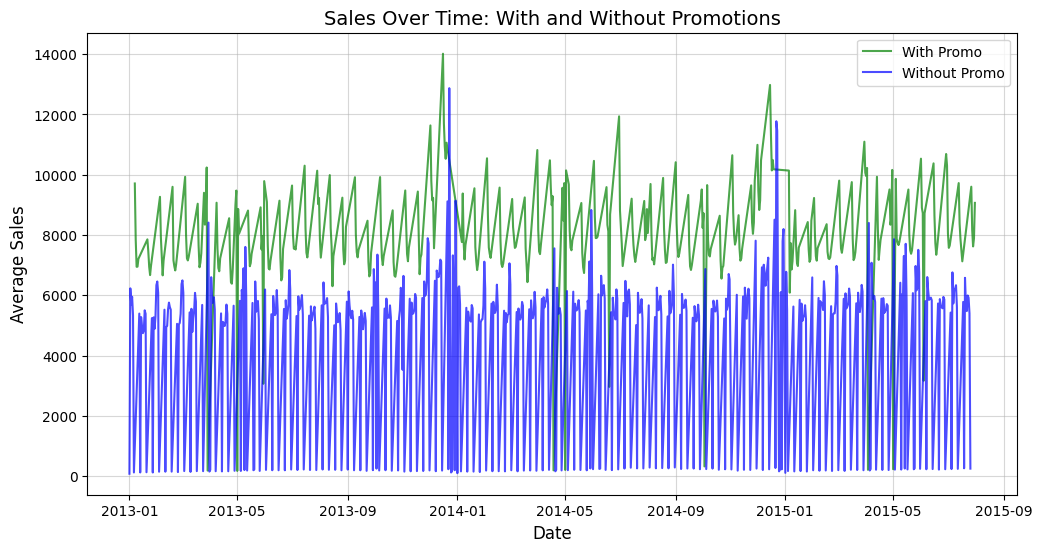

2025-01-03 10:40:14,783 - INFO - Successfully plotting promotion Analysis Sales Over Time


In [57]:
plot.plot_time_series(df)

In [97]:
df['StateHoliday'] = df['StateHoliday'].fillna(df['StateHoliday'].mode()[0])

In [64]:
df = df.dropna()

In [70]:
# Perform PCA Analysis
scaled_data, feature_names = sales_behavior.preprocess_pca(df)

In [71]:
pca, pca_result = sales_behavior.apply_pca(scaled_data)

2025-01-03 10:50:48,758 - INFO - Starting PCA plotting


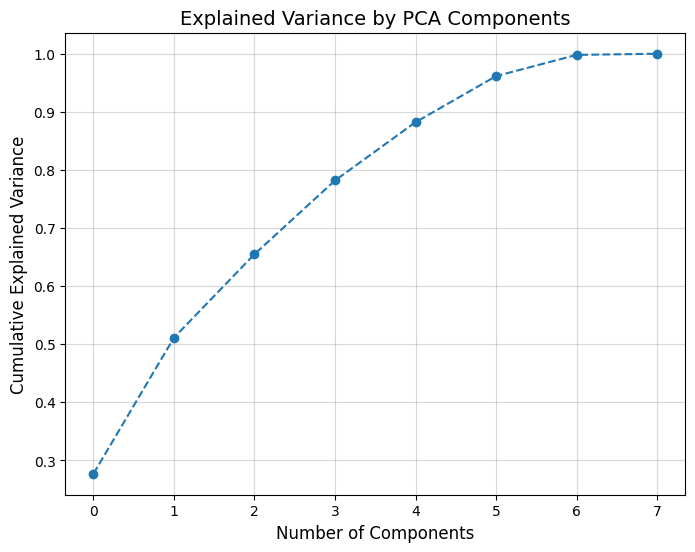

2025-01-03 10:50:48,861 - INFO - Successfully PCA plotting


In [72]:
plot.plot_explained_variance(pca)

2025-01-03 10:52:38,895 - INFO - Starting PCA Variance plotting


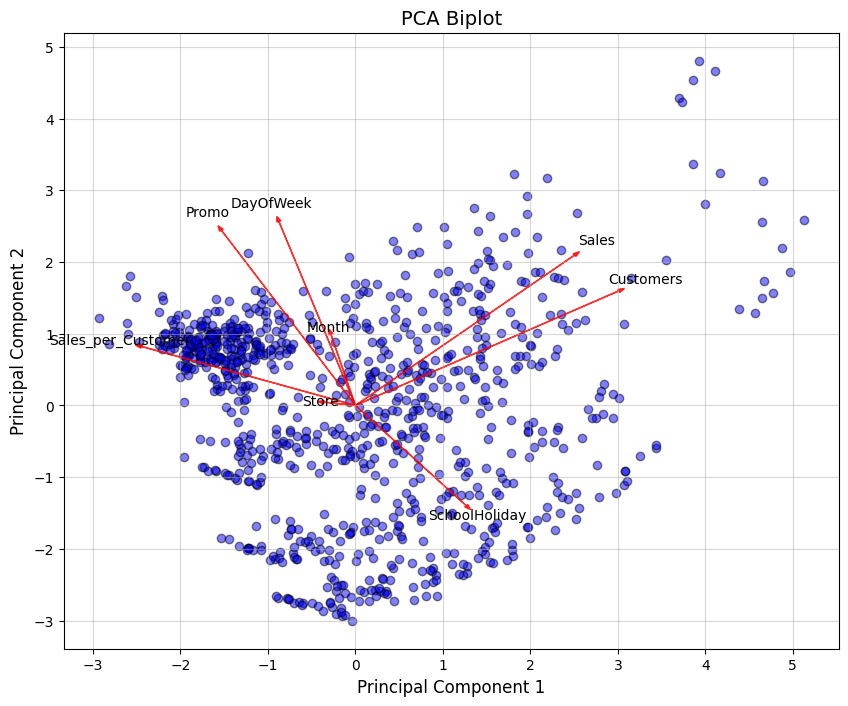

2025-01-03 10:52:39,335 - INFO - Successfully PCA VariAnce plotting


In [73]:
plot.plot_pca_biplot(pca_result, pca, feature_names)

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

2025-01-03 11:05:39,033 - INFO - Starting to Checking promotion effect Analysis


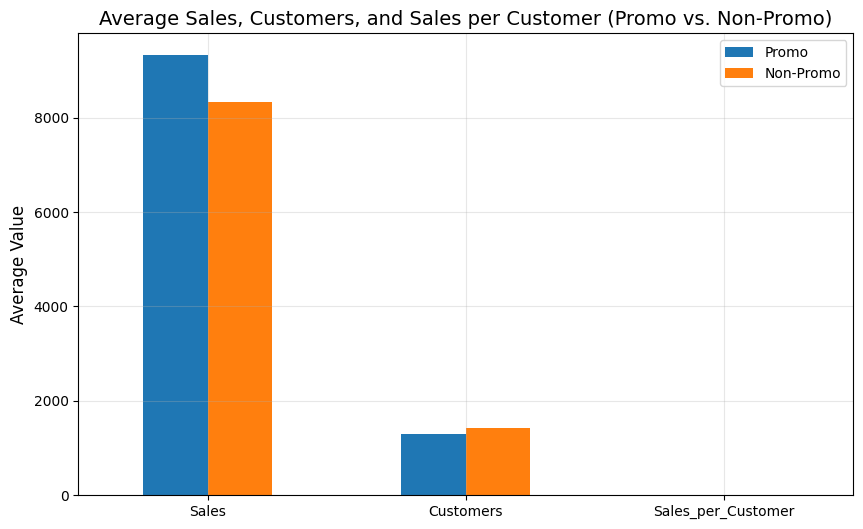

2025-01-03 11:05:39,174 - INFO - Successfully completing  promotion effect Analysis


In [80]:
df_promo_data, non_promo_data = plot.promo_effect_analysis(df)

2025-01-03 10:59:47,711 - INFO - Starting to promotion effectiness Analysis across store
2025-01-03 10:59:47,874 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 10:59:47,990 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


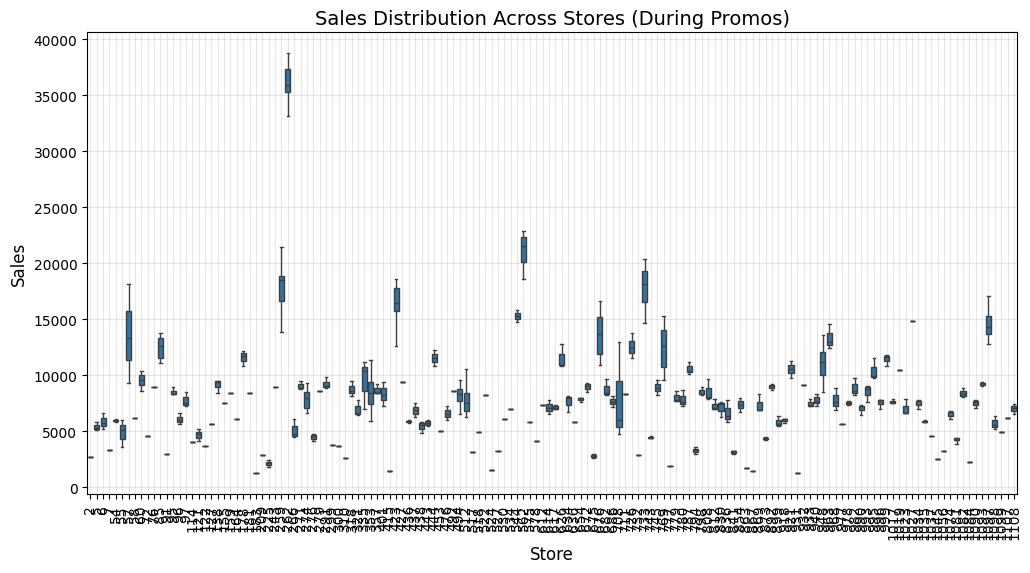

2025-01-03 10:59:48,893 - INFO - Successfully completing  promotion effectiness Analysis across store


In [77]:
plot.Promo_Effectiveness_Across_Stores(df_promo_data)

In [79]:
# plot.Promo_Performance_Across_Stores(df_promo_data)

2025-01-03 11:07:18,941 - INFO - Successfully completing plotting Seasonal promotion Analysis


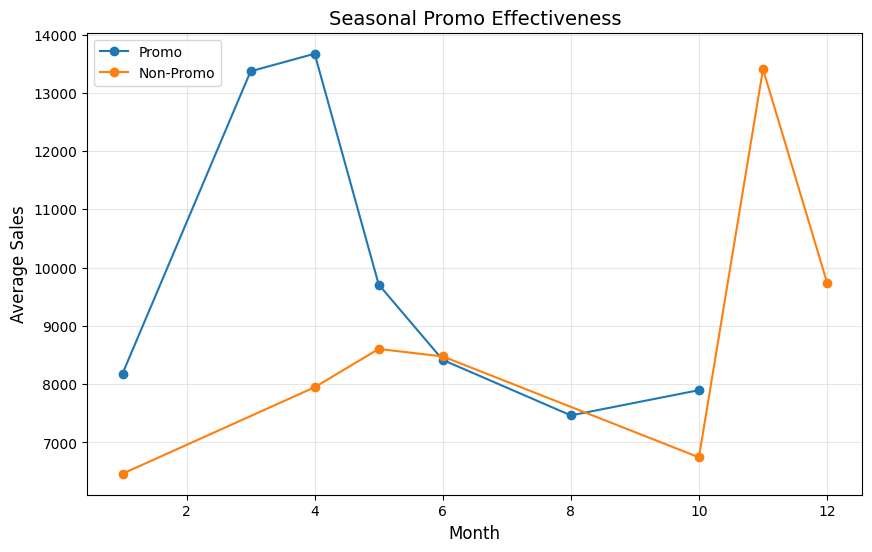

2025-01-03 11:07:19,087 - INFO - Successfully completing plotting Seasonal promotion Analysis


In [82]:
plot.Seasonal_Promo_Analysis_Line_Chart(df_promo_data, non_promo_data)

#### Trends of customer behavior during store opening and closing times

2025-01-03 11:15:56,268 - INFO - Starting Store open and close Analysis


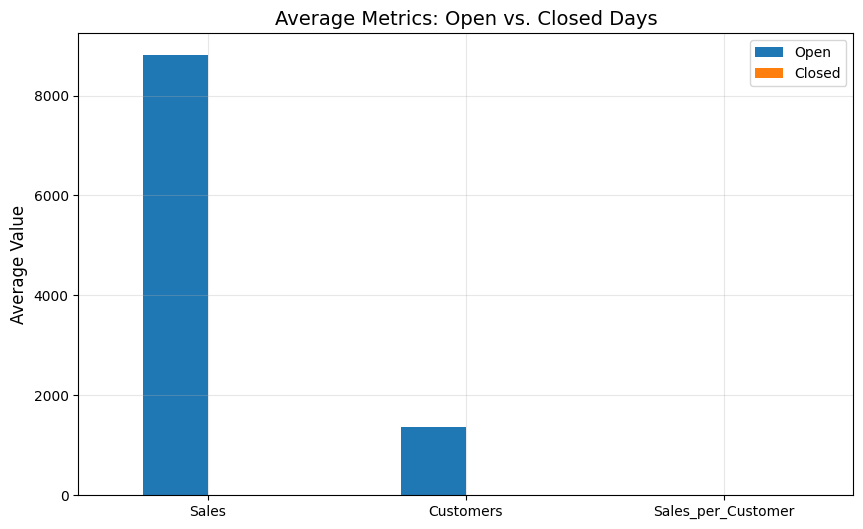

2025-01-03 11:15:56,362 - INFO - Successfully completing Store open and close Analysis


In [85]:
open_days, closed_days = plot.separate_by_store_open_close(df)

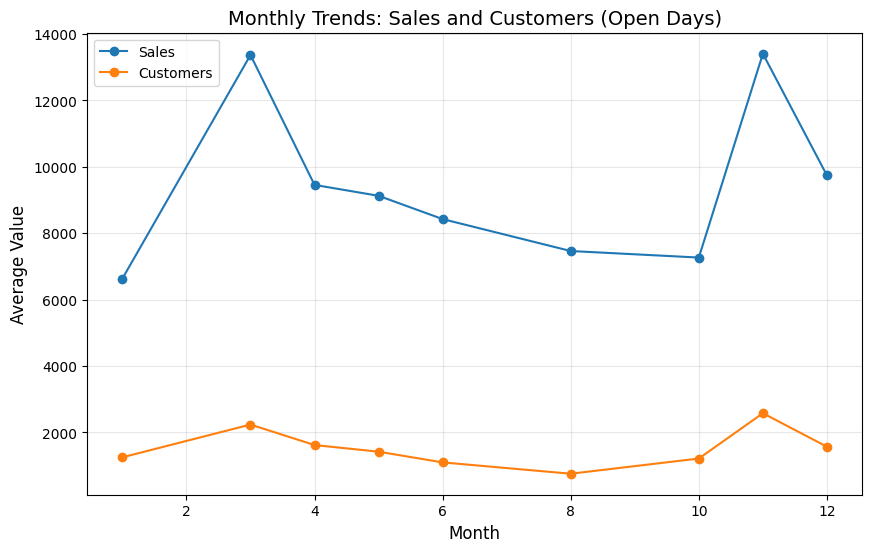

In [86]:
plot.Temporal_Trends(open_days)

In [88]:
# plot.Heatmap_of_Store_Activity(open_days)

2025-01-03 11:21:14,206 - INFO - Starting Scatter Plot: Holiday Periods and Behavior on Open Days Analysis


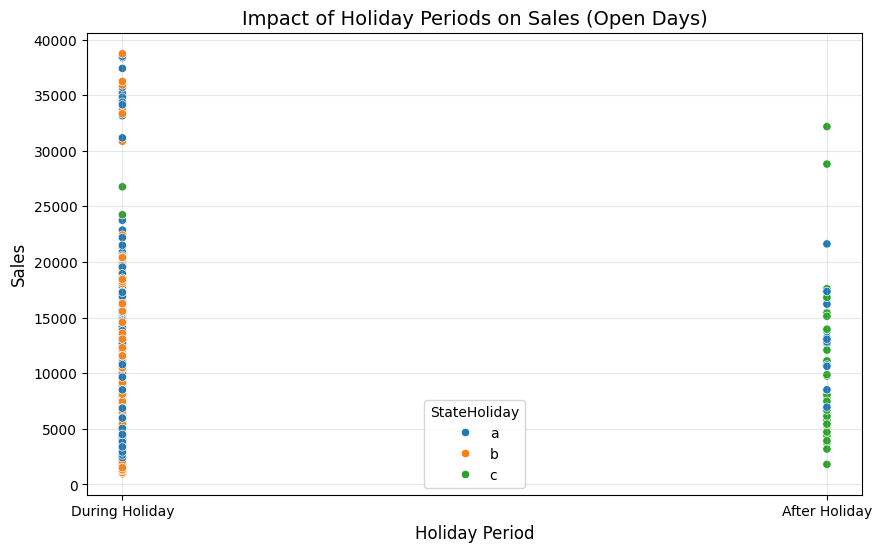

2025-01-03 11:21:14,545 - INFO - Successfully completing Scatter Plot: Holiday Periods and Behavior on Open Days Analysis


In [89]:
plot.Scatter_Plot_Holiday_Behavior_open_days(open_days)

#### Which stores are open on all weekdays? How does that affect their sales on weekends? 

2025-01-03 11:43:02,415 - INFO - Strating  Week day open Stors Analysis


Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

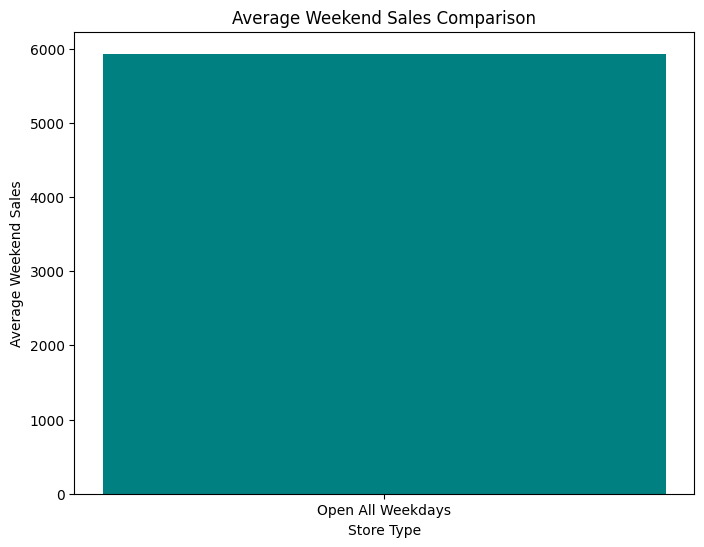

2025-01-03 11:43:02,598 - INFO - Successfully Completing Week day open Stors Analysis


In [105]:
plot.Identify_stores_open_all_weekdays(df)

#### Check how the assortment type affects sales

In [104]:
# Check summary statistics for sales by HolidayPeriod
sales_by_holiday = df.groupby('HolidayPeriod')['Sales'].describe()
sales_by_holiday


,count,mean,std,min,25%,50%,75%,max
HolidayPeriod,,,,,,,,
After Holiday,40175.0,6874.590616,3782.920211,0.0,4874.0,6707.0,8831.0,33093.0
Before Holiday,34780.0,5916.391317,4337.391834,0.0,3012.5,6022.0,8553.0,33357.0
During Holiday,36074.0,1751.875201,3670.164495,0.0,0.0,0.0,0.0,38722.0
Normal,906180.0,5879.653831,3746.417110,0.0,3917.0,5787.0,7853.0,41551.0


2025-01-03 11:43:06,748 - INFO - Strating  Box Plot sales over Holiday Analysis


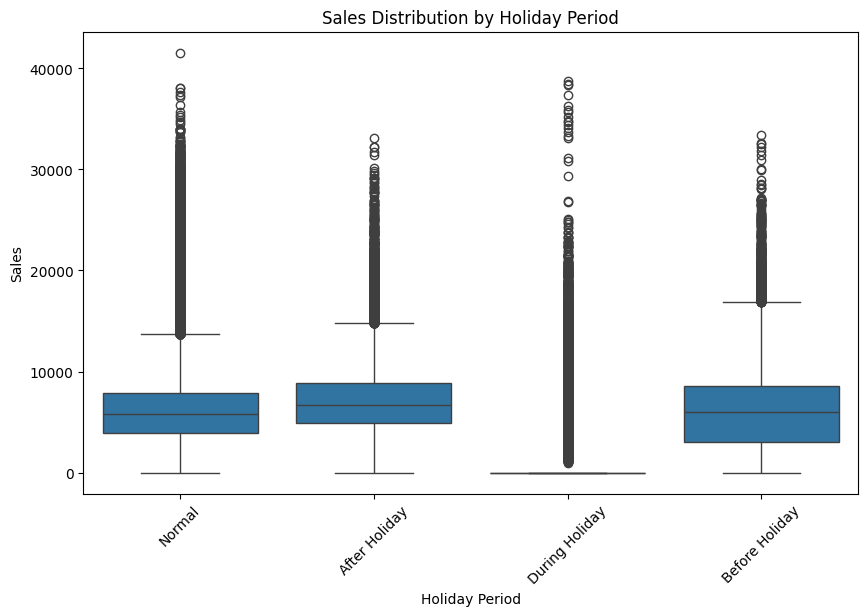

2025-01-03 11:43:08,015 - INFO - Successfully Completing Box Plot sales over Holiday Analysis


In [106]:
plot.Boxplot_of_Sales_by_HolidayPeriod(df)

2025-01-03 11:42:25,460 - INFO - Strating  Bar Plot sales over Holiday Analysis


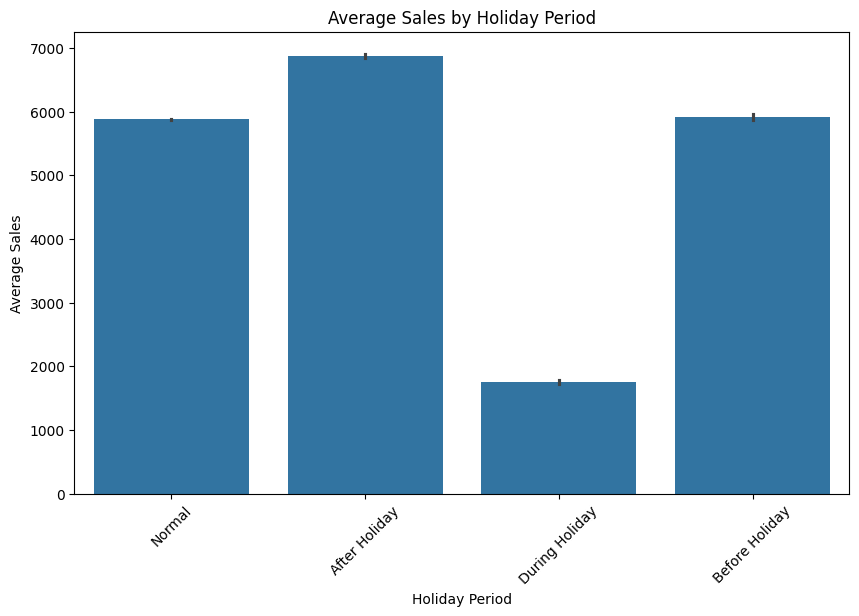

2025-01-03 11:42:39,256 - INFO - Successfully Completing Bar Plot sales over Holiday Analysis


In [103]:
plot.Bar_plot_mean_sales_by_HolidayPeriod(df)

2025-01-03 11:44:38,691 - INFO - Strating  Violin Plot sales over Holiday Analysis


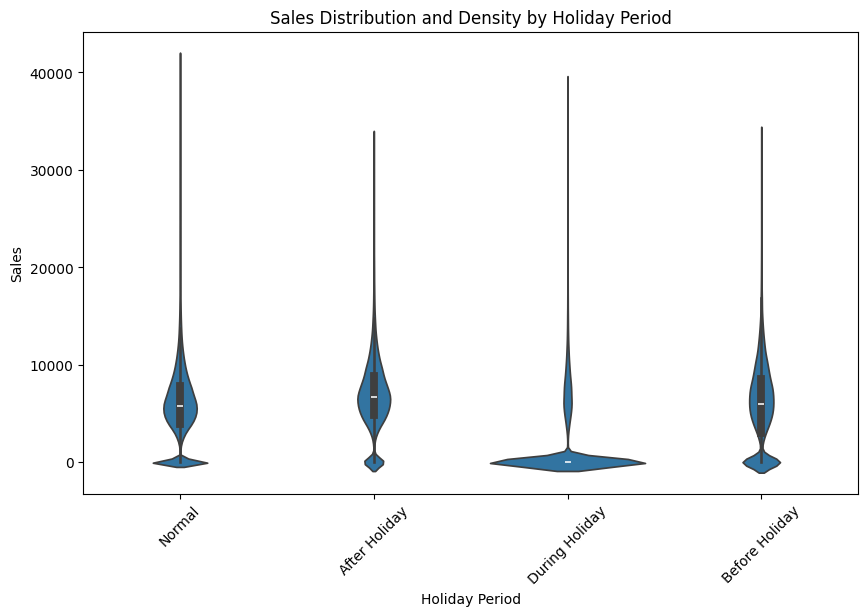

2025-01-03 11:44:41,977 - INFO - Successfully Completing Violin Plot sales over Holiday Analysis


In [107]:
plot.Violin_plot_Sales_by_HolidayPeriod(df)

2025-01-03 11:46:34,154 - INFO - Strating  Scatter Plot Sales vs. Customers by HolidayPeriod Analysis


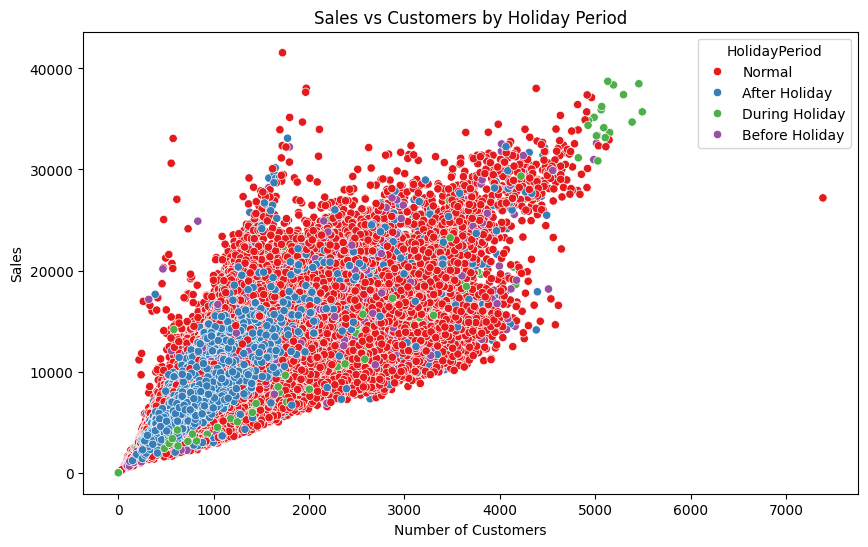

2025-01-03 11:46:49,988 - INFO - Successfully Completing Scatter Plot Sales vs. Customers by HolidayPeriod Analysis


In [108]:
plot.Scatter_plot_Sales_Customers_by_HolidayPeriod(df)

2025-01-03 11:50:21,437 - INFO - Strating heatmap for sales open, customer and promotion Analysis


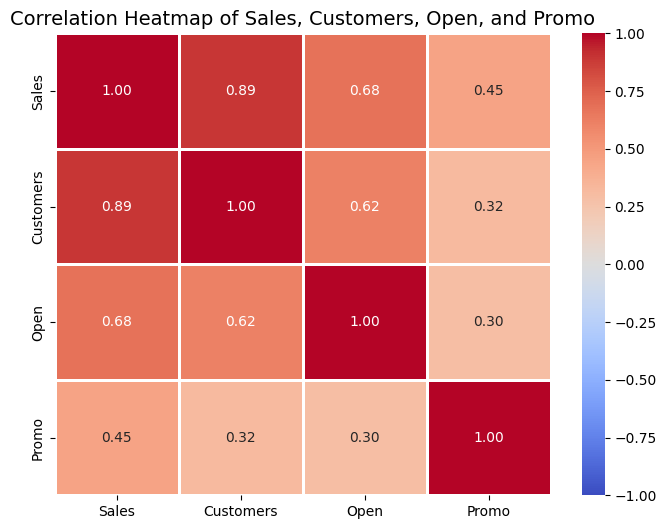

2025-01-03 11:50:21,844 - INFO - Successfully Completing heatmap for sales open, customer and promotion Analysis


In [110]:
plot.heatmap_correlation_analysis(df)

#### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

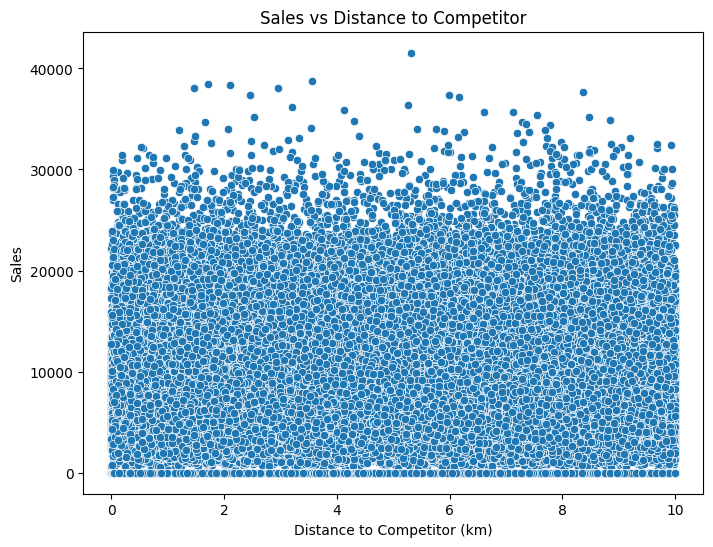

In [113]:
df_dis = plot.Create_sample_distance(df)

2025-01-03 12:03:06,641 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 12:03:07,007 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


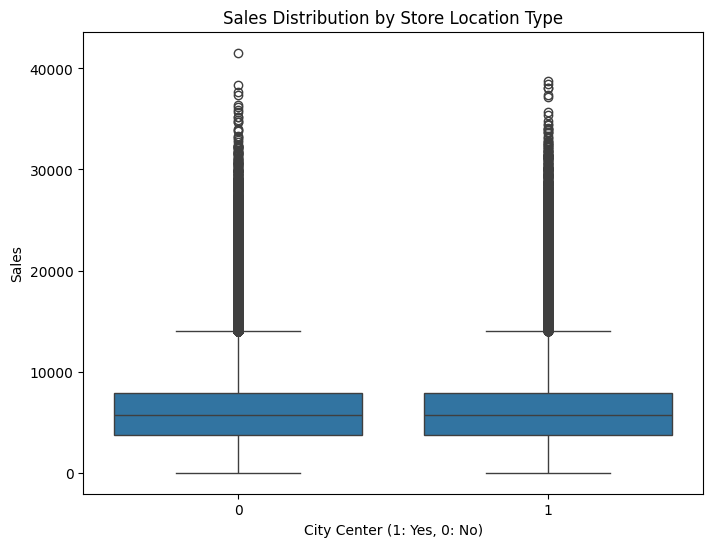

In [115]:
df_city = plot.create_sample_city(df)

                          Sales  Distance_to_Competitor
Sales                   1.00000                 0.00209
Distance_to_Competitor  0.00209                 1.00000


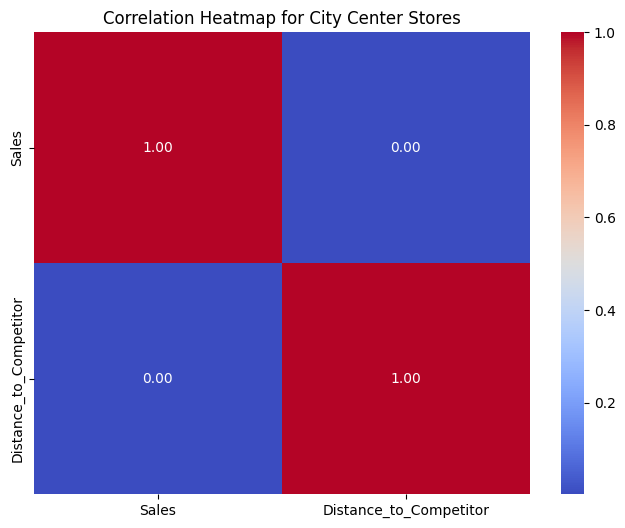

In [118]:
# df_city
plot.city_center_stores(df_city)

#### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

# Task 2

In [6]:
df = pd.read_csv('../../week_4/train_holiday.csv', low_memory = False)

In [7]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


#### Training data preprocessing

In [9]:
stateholiday_mapping = df_train.set_index('Store')['StateHoliday'].to_dict()

# Step 3: Replace NaN values in df['StateHoliday']
df['StateHoliday'] = df.apply(
    lambda row: stateholiday_mapping.get(row['Store'], row['StateHoliday'])
    if pd.isna(row['StateHoliday']) else row['StateHoliday'], 
    axis=1
)

In [10]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,a,1,Normal
1,2,5,2015-07-31,6064,625,1,1,a,1,Normal
2,3,5,2015-07-31,8314,821,1,1,a,1,Normal
3,4,5,2015-07-31,13995,1498,1,1,a,1,Normal
4,5,5,2015-07-31,4822,559,1,1,a,1,Normal
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,During Holiday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,During Holiday


In [11]:
df[df.isna().any(axis=1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod


### Convert non-numeric columns to numeric
#### For categorical columns, use one-hot encoding or label encoding

In [12]:
df = pd.get_dummies(df, columns=['StateHoliday', 'HolidayPeriod'], drop_first=True)

#### Extract features from the Date column

In [14]:
# Extract features from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.weekday  # Weekday (0=Monday, 6=Sunday)
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend (1=True, 0=False)
df['Month'] = df['Date'].dt.month  # Month
df['Year'] = df['Date'].dt.year  # Year
df['Day'] = df['Date'].dt.day  # Day
df['Day_of_Year'] = df['Date'].dt.dayofyear  # Day of the year

In [15]:
# Beginning, mid, and end of the month
df['Is_Beginning_Month'] = df['Day'].apply(lambda x: 1 if x <= 10 else 0)
df['Is_Mid_Month'] = df['Day'].apply(lambda x: 1 if 11 <= x <= 20 else 0)
df['Is_End_Month'] = df['Day'].apply(lambda x: 1 if x > 20 else 0)

In [16]:
import numpy as np
# Create features for holidays
# Assuming the holiday periods are marked in 'HolidayPeriod'
df['Days_to_Holiday'] = np.where(df['HolidayPeriod_During Holiday'] == 1, 0, 7)  # Example: Default 7 days
df['Days_After_Holiday'] = np.where(df['HolidayPeriod_During Holiday'] == 1, 0, 7)  # Example: Default 7 days

In [17]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,...,Is_Weekend,Month,Year,Day,Day_of_Year,Is_Beginning_Month,Is_Mid_Month,Is_End_Month,Days_to_Holiday,Days_After_Holiday
0,1,5,2015-07-31,5263,555,1,1,1,True,False,...,0,7,2015,31,212,0,0,1,7,7
1,2,5,2015-07-31,6064,625,1,1,1,True,False,...,0,7,2015,31,212,0,0,1,7,7
2,3,5,2015-07-31,8314,821,1,1,1,True,False,...,0,7,2015,31,212,0,0,1,7,7
3,4,5,2015-07-31,13995,1498,1,1,1,True,False,...,0,7,2015,31,212,0,0,1,7,7
4,5,5,2015-07-31,4822,559,1,1,1,True,False,...,0,7,2015,31,212,0,0,1,7,7


In [18]:
# Drop unnecessary columns
# Drop the original Date column if not needed
df.drop(['Date'], axis=1, inplace=True)

In [19]:
# Scaling numeric columns
# Select numeric columns for scaling
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Sales', 'Customers', 'Day_of_Year', 'Days_to_Holiday', 'Days_After_Holiday']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#### Testing data preprocessing

In [39]:
stateholiday_mapping_test = df_test.set_index('Store')['StateHoliday'].to_dict()

# Step 3: Replace NaN values in df['StateHoliday']
df_state_test['StateHoliday'] = df_state_test.apply(
    lambda row: stateholiday_mapping.get(row['Store'], row['StateHoliday'])
    if pd.isna(row['StateHoliday']) else row['StateHoliday'], 
    axis=1
)

In [52]:
df_state_test.dropna(inplace=True)

In [54]:
df_state_test[df_state_test.isna().any(axis = 1)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod


In [67]:
test_data = pd.get_dummies(df_state_test, columns=['StateHoliday', 'HolidayPeriod'], drop_first=True)

In [68]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_a', 'HolidayPeriod_Before Holiday',
       'HolidayPeriod_During Holiday', 'HolidayPeriod_Normal'],
      dtype='object')

In [69]:
# test_data
# df_sample.Sales.unique()

In [70]:
# Merge the dataframes on the 'Id' column
# test_data = test_data.merge(df_sample, on='Id', how='left')

In [72]:
# Extract features from the Date column
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Weekday'] = test_data['Date'].dt.weekday  # Weekday (0=Monday, 6=Sunday)
test_data['Is_Weekend'] = test_data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend (1=True, 0=False)
test_data['Month'] = test_data['Date'].dt.month  # Month
test_data['Year'] = test_data['Date'].dt.year  # Year
test_data['Day'] = test_data['Date'].dt.day  # Day
test_data['Day_of_Year'] = test_data['Date'].dt.dayofyear  # Day of the year

In [73]:
# Beginning, mid, and end of the month
test_data['Is_Beginning_Month'] = test_data['Day'].apply(lambda x: 1 if x <= 10 else 0)
test_data['Is_Mid_Month'] = test_data['Day'].apply(lambda x: 1 if 11 <= x <= 20 else 0)
test_data['Is_End_Month'] = test_data['Day'].apply(lambda x: 1 if x > 20 else 0)

In [74]:
# Create features for holidays
# Assuming the holiday periods are marked in 'HolidayPeriod'
test_data['Days_to_Holiday'] = np.where(test_data['HolidayPeriod_During Holiday'] == 1, 0, 7)  # Example: Default 7 days
test_data['Days_After_Holiday'] = np.where(test_data['HolidayPeriod_During Holiday'] == 1, 0, 7)  # Example: Default 7 days

In [75]:
test_data.drop(['Date'], axis=1, inplace=True)

In [77]:
numeric_columns = ['Day_of_Year', 'Days_to_Holiday', 'Days_After_Holiday']
scaler = StandardScaler()
test_data[numeric_columns] = scaler.fit_transform(test_data[numeric_columns])

In [71]:
df_state_test[df_state_test.isna().any(axis = 1)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod


In [21]:
X_train = df

In [79]:
# df.to_csv('../../week_4/train.csv')
# test_data.to_csv('../../week_4/test.csv')

In [4]:
df = pd.read_csv('../../week_4/train.csv')
test_data = pd.read_csv('../../week_4/test.csv')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Splitting features (X) and target (y) for training and testing
X_train = df.drop(columns=['Sales'])  # Replace 'Sales' with your target column name
y_train = df['Sales']
# X_test = test_data
# y_test = test_data['Sales']

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for RandomForest, but included for flexibility
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.4f}")
# print(f"Mean Absolute Error: {mae:.4f}")
# print(f"R2 Score: {r2:.4f}")

# # Save the pipeline for future use
joblib.dump(pipeline, '../../week_4/regression_pipeline.pkl')



MemoryError: could not allocate 134217728 bytes